In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, roc_auc_score

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [4]:
original = pd.read_csv('Phising_dataset_predict.csv')
data = original.copy()

data = data.dropna()
data = data.drop(columns = ['Unnamed: 0'])
X = data.drop(columns = ['Phising'])
Tar = data['Phising']
AL = pd.DataFrame(original[["AtSymbol", "NumPercent"]])

var = pd.DataFrame(X)
tar = pd.DataFrame(Tar)

X_train, X_test, y_train, y_test = train_test_split(var,tar,test_size = 0.2, random_state = 42)

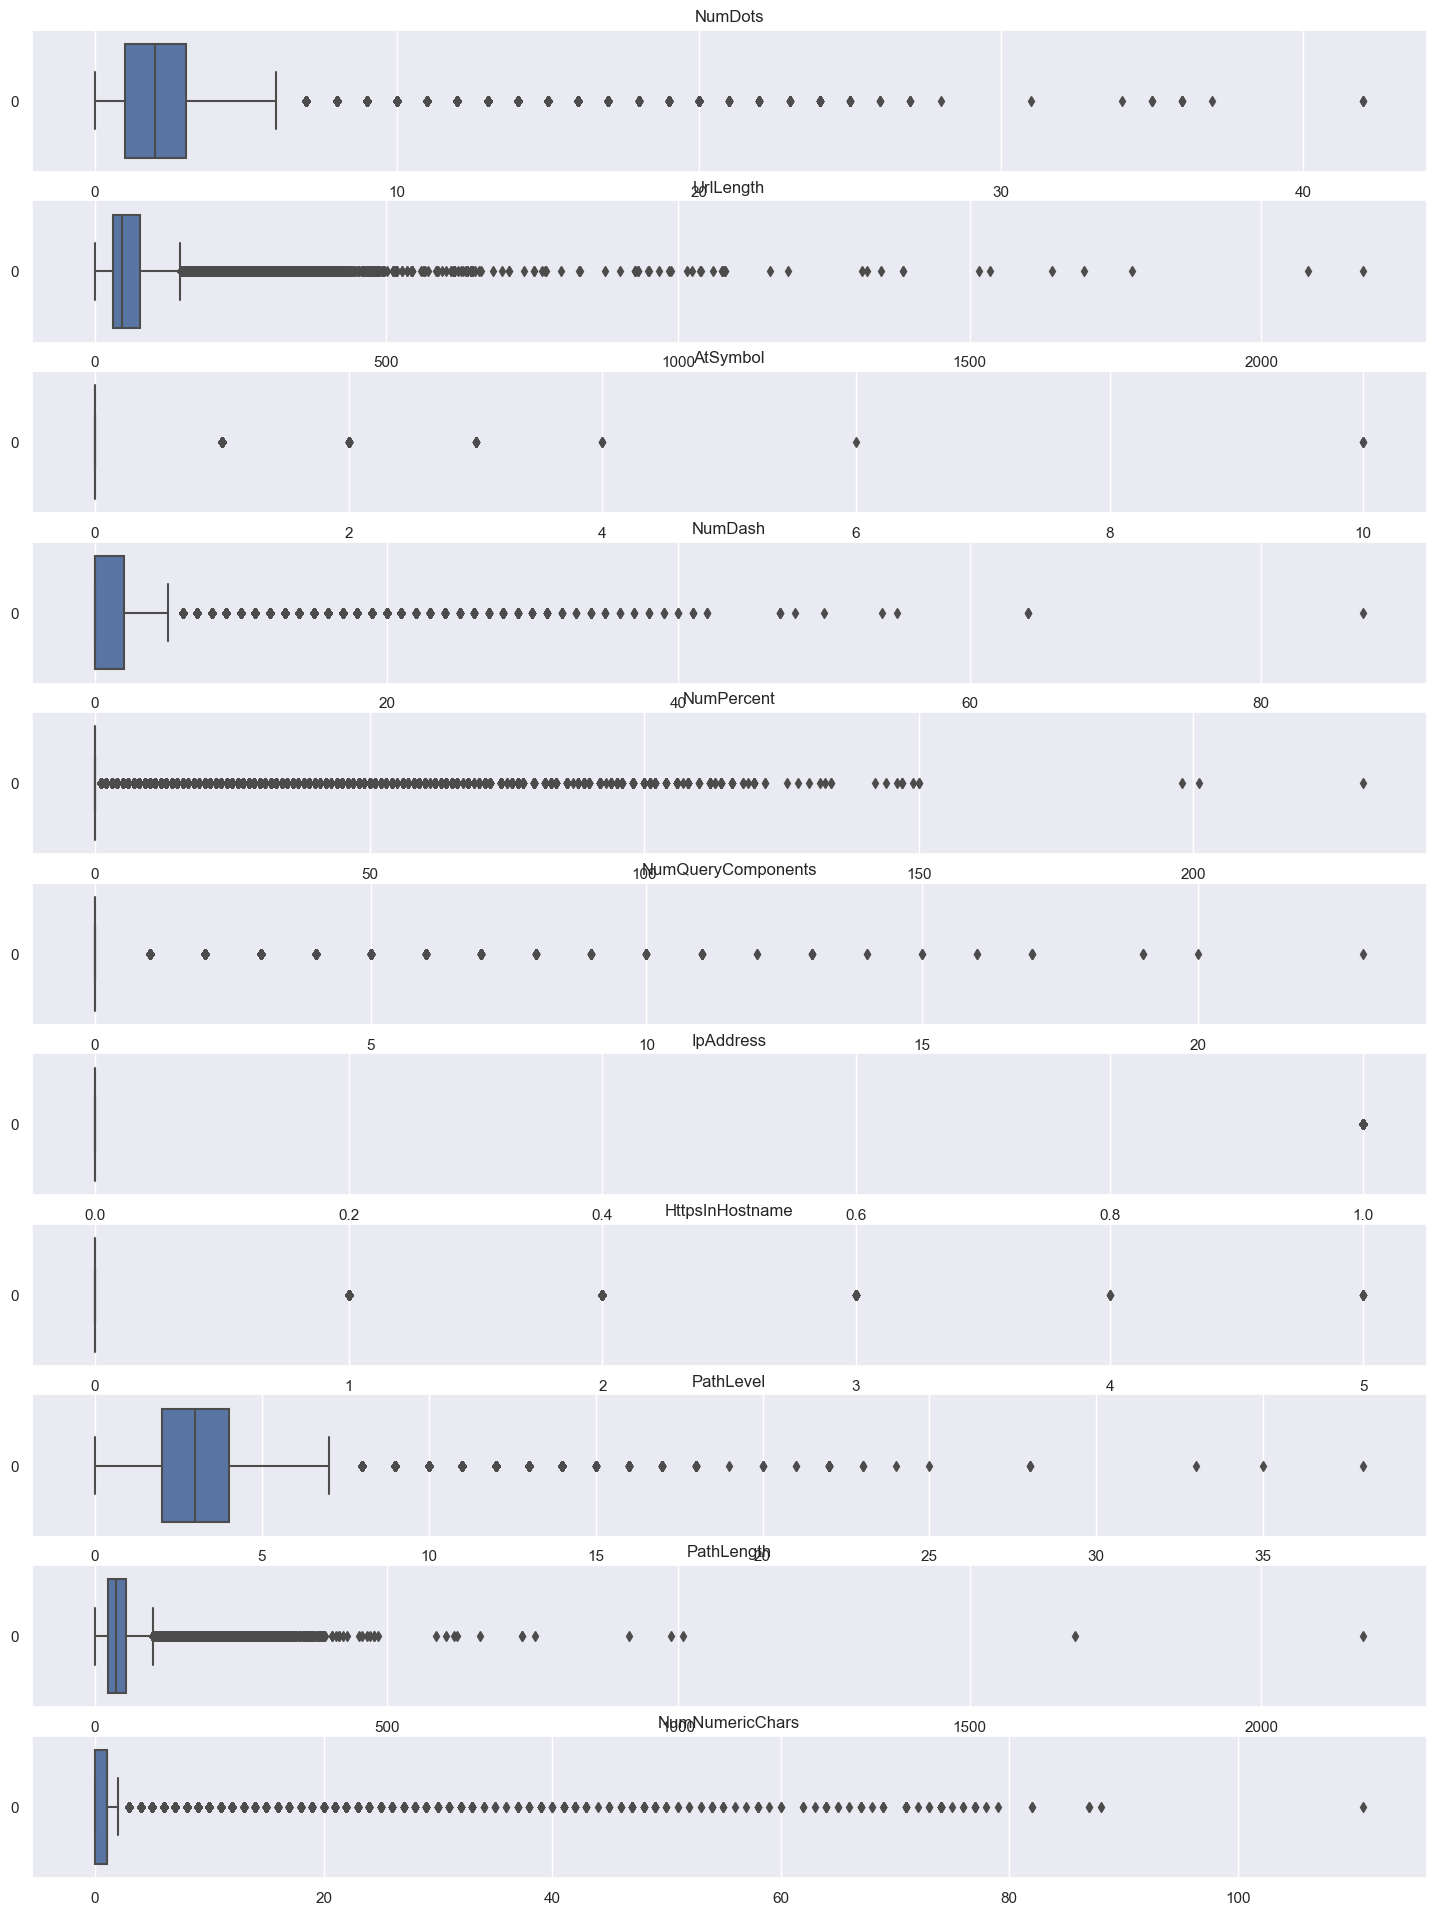

In [5]:
f, axes = plt.subplots(11, figsize=(18, 24))

count = 0
for i in X:
    sb.boxplot(data = X[i], orient = "h", ax = axes[count])
    axes[count].set_title(i)
    count += 1
    

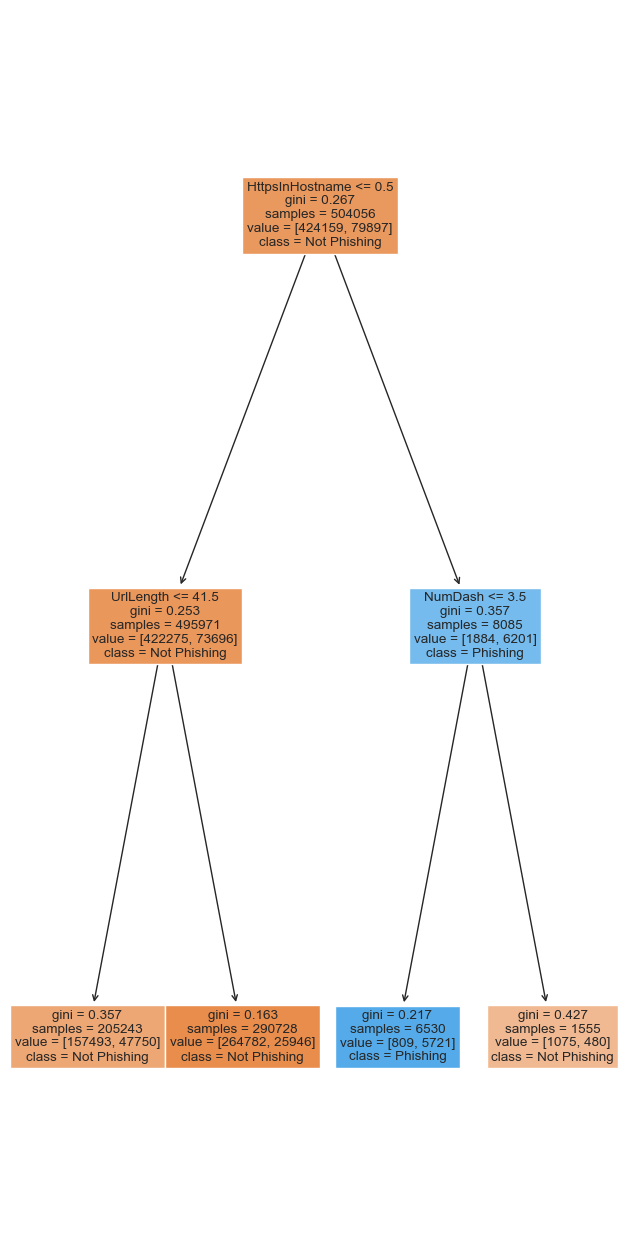

In [6]:
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X_train, y_train)

plt.figure(figsize=(8, 16))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['Not Phishing', 'Phishing'])
plt.show()

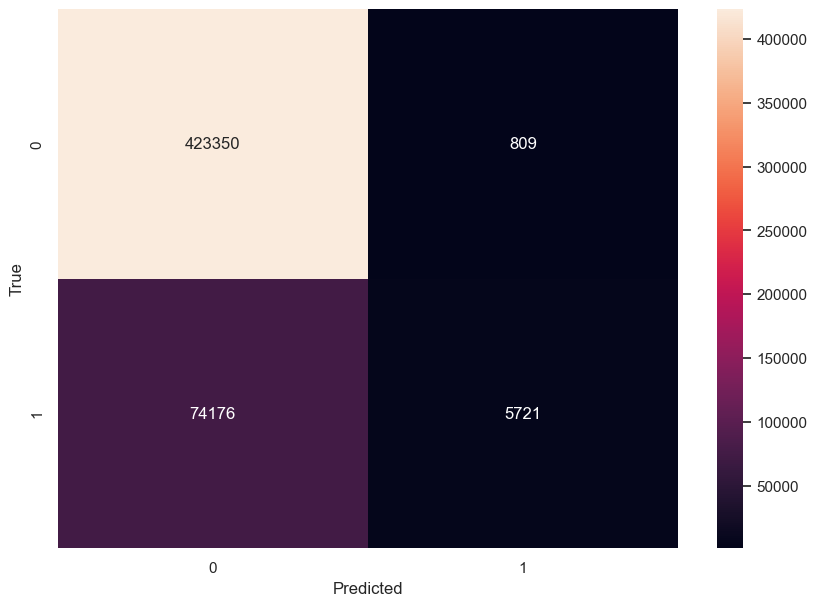

In [7]:
y_pred = clf.predict(X_train)

cm = confusion_matrix(y_train, y_pred)

plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [8]:
true_positive = cm[1, 1]
true_negative = cm[0, 0]
false_positive = cm[0, 1]
false_negative = cm[1, 0]

# Calculate true positive rate (sensitivity)
true_positive_rate = true_positive / (true_positive + false_negative)

# Calculate true negative rate (specificity)
true_negative_rate = true_negative / (true_negative + false_positive)
false_positive_rate = false_positive / (false_positive + true_negative)

# Calculate false negative rate (FNR)
false_negative_rate = false_negative / (false_negative + true_positive)
print("Classification Accuracy: ", clf.score(X_test, y_test))
print("True Positive Rate: ", true_positive_rate)
print("True Negative Rate: ", true_negative_rate)
print("False Positive Rate: ", false_positive_rate)
print("False Negative Rate: ", false_negative_rate)

Classification Accuracy:  0.8500892750862993
True Positive Rate:  0.07160469103971363
True Negative Rate:  0.9980926963709363
False Positive Rate:  0.0019073036290636295
False Negative Rate:  0.9283953089602863


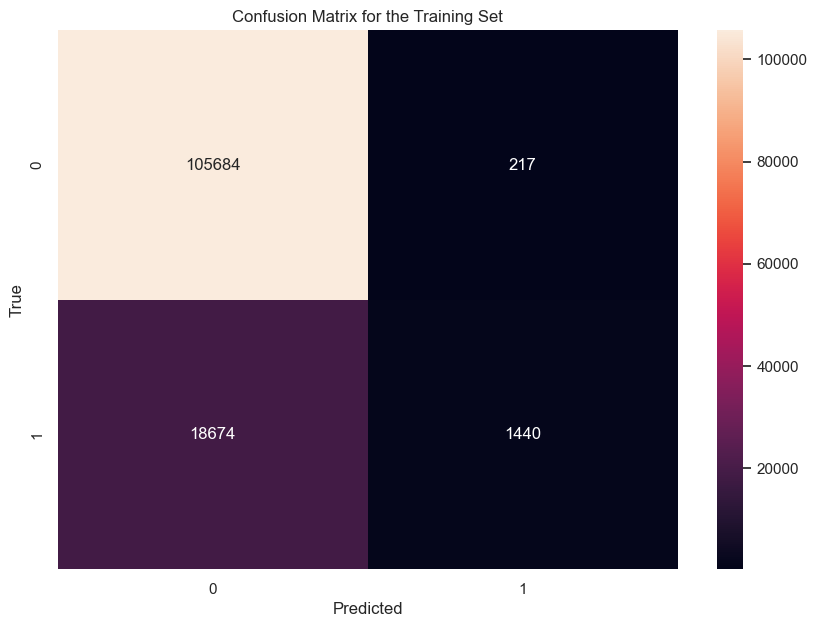

In [9]:
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X_test, y_test)

y_pred_test = clf.predict(X_test)

cm_train = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10, 7))
sb.heatmap(cm_train, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Training Set')
plt.show()

In [10]:
true_positive = cm_train[1, 1]
true_negative = cm_train[0, 0]
false_positive = cm_train[0, 1]
false_negative = cm_train[1, 0]

# Calculate true positive rate (sensitivity)
true_positive_rate = true_positive / (true_positive + false_negative)

# Calculate true negative rate (specificity)
true_negative_rate = true_negative / (true_negative + false_positive)
false_positive_rate = false_positive / (false_positive + true_negative)

# Calculate false negative rate (FNR)
false_negative_rate = false_negative / (false_negative + true_positive)
print("Classification Accuracy: ", clf.score(X_test, y_test))
print("True Positive Rate: ", true_positive_rate)
print("True Negative Rate: ", true_negative_rate)
print("False Positive Rate: ", false_positive_rate)
print("False Negative Rate: ", false_negative_rate)

Classification Accuracy:  0.8500892750862993
True Positive Rate:  0.07159192602167644
True Negative Rate:  0.9979509164219412
False Positive Rate:  0.002049083578058753
False Negative Rate:  0.9284080739783236


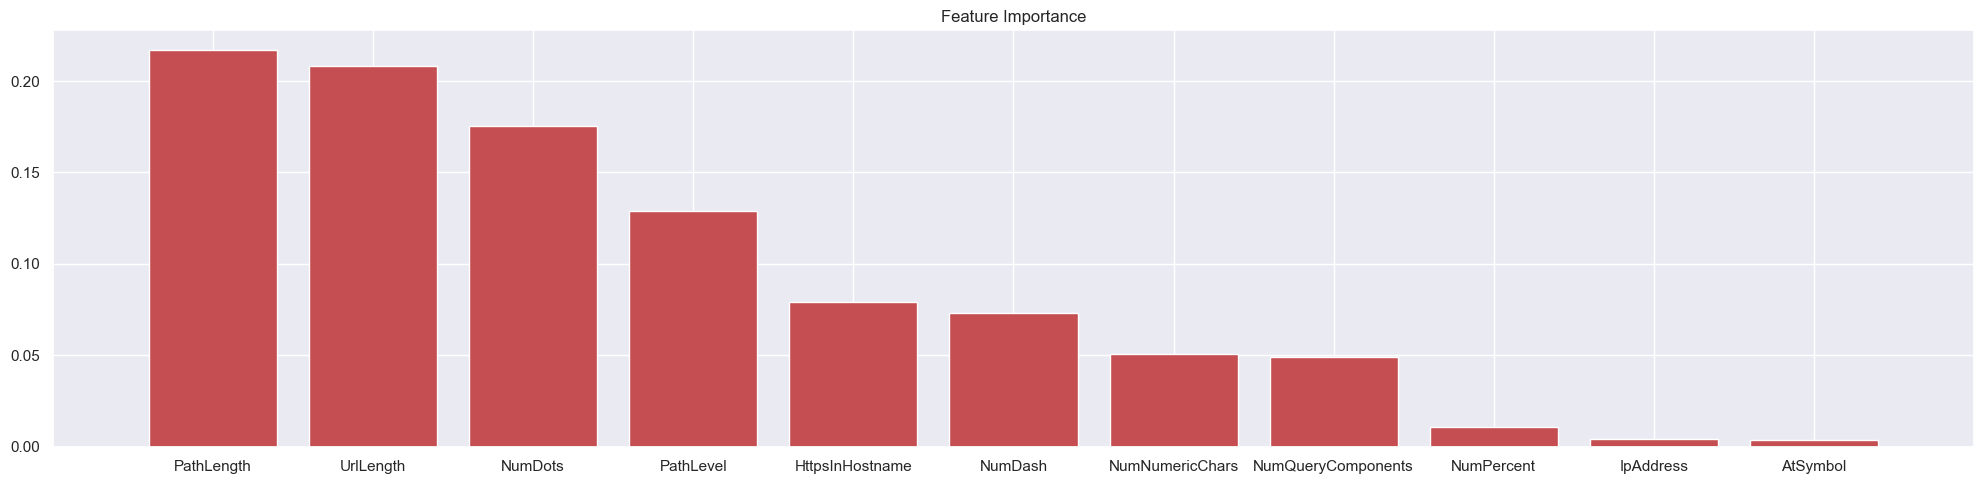

In [11]:
rfc = RandomForestClassifier(n_estimators=25, random_state=42)
rfc.fit(X_train, y_train.values.ravel())

importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

In [12]:
df = pd.read_csv('Phising_dataset_predict.csv')
df = df.dropna()
df = df.drop(columns=['Unnamed: 0', 'IpAddress', 'AtSymbol', 'NumPercent'])
X = df.drop(columns = ['Phising'])
Tar = df['Phising']

var = pd.DataFrame(X)
tar = pd.DataFrame(Tar)

X_train, X_test, y_train, y_test = train_test_split(var,tar,test_size = 0.2, random_state = 42)

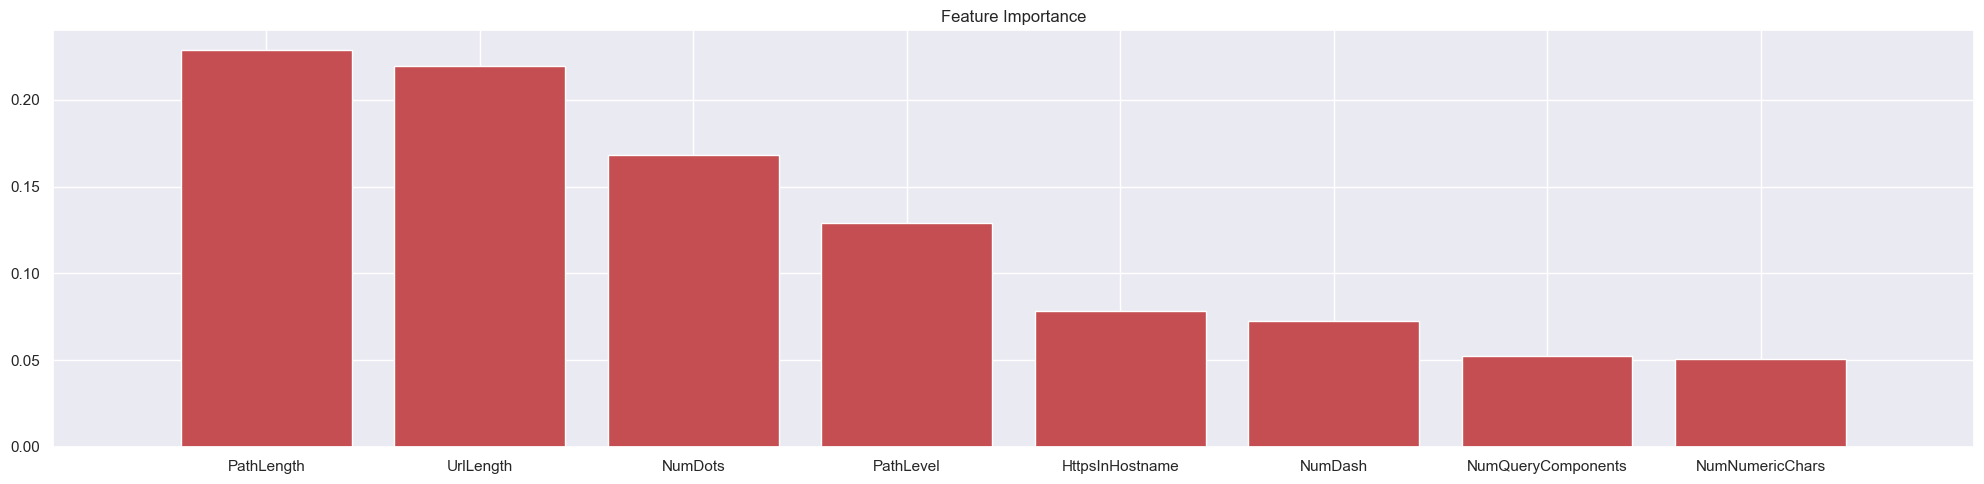

In [13]:
rfc = RandomForestClassifier(n_estimators=25, random_state=42)
rfc.fit(X_train, y_train.values.ravel())

importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

# might need gridsearch to find optimal n_estimators

In [14]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train.values.ravel())

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8699757965321588


In [15]:
# Assuming 'var' is a DataFrame containing your data
# Define numerical features, assuming boolean features are already encoded as 0/1
numerical_features = var.columns.tolist()  # This will now include the previously mislabeled categorical feature

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
        # No need for 'cat' as the boolean data is already numerical
    ])

# Define the pipeline with SMOTE and RandomForestClassifier using ImbPipeline
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Continue with model training and evaluation as before
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'AUC-ROC: {roc_auc_score(y_test, y_pred)}')

              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89    105901
         1.0       0.49      0.82      0.61     20114

    accuracy                           0.83    126015
   macro avg       0.72      0.83      0.75    126015
weighted avg       0.89      0.83      0.85    126015

AUC-ROC: 0.8290196252462277


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')    

Accuracy: 0.8335515613220649


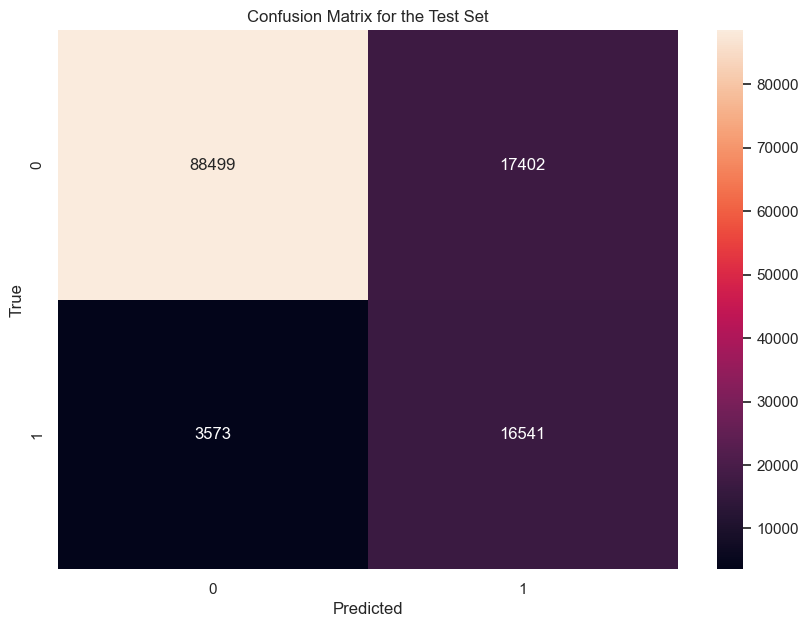

In [17]:
import matplotlib.pyplot as plt
import seaborn as sb
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sb.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Test Set')
plt.show()

In [18]:
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

TPR = TP / (TP + FN) # Also known as sensitivity, or recall
FPR = FP / (FP + TN)
TNR = TN / (TN + FP) # Also known as specificity

print(f'True Positive Rate (TPR/Recall/Sensitivity): {TPR}')
print(f'False Positive Rate (FPR): {FPR}')
print(f'True Negative Rate (TNR/Specificity): {TNR}')

True Positive Rate (TPR/Recall/Sensitivity): 0.8223625335587154
False Positive Rate (FPR): 0.16432328306625998
True Negative Rate (TNR/Specificity): 0.83567671693374


In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
y_train_pred = pipeline.predict(X_train)

Accuracy: 0.8335515613220649


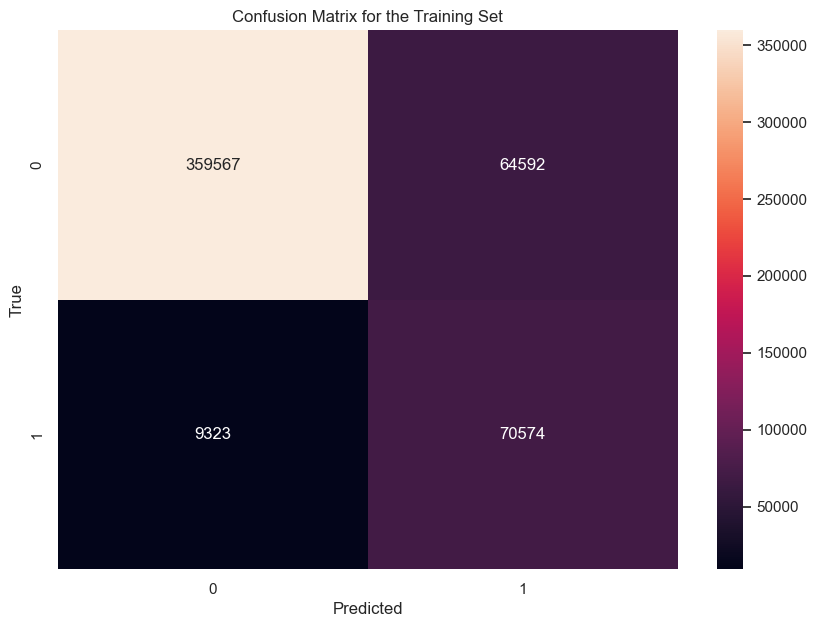

In [20]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 7))
sb.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Training Set')
plt.show()

In [21]:
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

TPR = TP / (TP + FN) # Also known as sensitivity, or recall
FPR = FP / (FP + TN)
TNR = TN / (TN + FP) # Also known as specificity

print(f'True Positive Rate (TPR/Recall/Sensitivity): {TPR}')
print(f'False Positive Rate (FPR): {FPR}')
print(f'True Negative Rate (TNR/Specificity): {TNR}')

True Positive Rate (TPR/Recall/Sensitivity): 0.883312264540596
False Positive Rate (FPR): 0.15228251669774778
True Negative Rate (TNR/Specificity): 0.8477174833022523
